In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests as req
from census import Census
import json
import csv



# Census API Key
#from config import api_key
c = Census("49f2db3e7faca8ecd92103d5bd5c5c765442d598", year=2016)


In [46]:
# Logic:
#Get the cites to query
#Get the census fields to query

sourceFile = pd.ExcelFile('Project1_AmazonSites.xlsx')

SitesDF=sourceFile.parse('AmazonSites') 

CitiesDf=sourceFile.parse('AmazonCities') 
CitiesDf=CitiesDf[['PlaceCode','StateCode']]

CensusFieldsDF=sourceFile.parse('CensusFields')
CensusFieldsMapDF = CensusFieldsDF[["Datafield","Category","CensusCode"]]
CensusFieldsDF = CensusFieldsDF[["Datafield","CensusCode"]]

#Converting the CensusFieldsDF into a dictionary.
dictCensusFields = CensusFieldsDF.set_index('CensusCode').to_dict()
dictCensusFields = dictCensusFields['Datafield']

print(dictCensusFields)
#CitiesDf.head()

{'B01002_001E': 'Median Age', 'B19013_001E': 'Median Household Income', 'B25077_001E': 'Median Home Value', 'B25064_001E': 'Median Rent', 'B23025_002E': 'LaborForce', 'B23025_004E': 'Emp_Total', 'B23025_003E': 'Civilian_labor_force', 'C24010_044E': 'Emp_Comp_Math_Female', 'C24010_040E': 'Emp_Mgment_Occp_Female', 'C24010_008E': 'Emp_Comp_Math_Male', 'C24010_006E': 'Emp_Mgment_Occp_Male', 'B15003_021E': 'Ed_Associates', 'B15003_022E': 'Ed_Bachelors', 'B15003_025E': 'Ed_Doctorate', 'B15003_018E': 'Ed_GED', 'B15003_017E': 'Ed_HighSchool', 'B15003_023E': 'Ed_Masters', 'B15003_024E': 'Ed_Professional', 'B01003_001E': 'Total Population', 'B02001_004E': 'Pop_American_Indian', 'B02001_005E': 'Population_Asian', 'B02001_003E': 'Pop_Black', 'B03001_003E': 'Pop_Hispanic_Origin', 'B02001_006E': 'Pop_Native_Hawaiian', 'B02001_007E': 'Pop_Other', 'B02001_008E': 'Pop_two_or_more_races', 'B02001_002E': 'Pop_White', 'B08136_001E': 'Commute_Time', 'B08136_004E': 'Commute_Time_Carpool', 'B08136_012E': 'Co

In [47]:

# Build your Census API call.
arrCensusFields = ['NAME']

for k in dictCensusFields.keys():
    arrCensusFields.append(k)
    
censusDF= pd.DataFrame()

for city in CitiesDf.values:
    cityCode = str(city[0])
    stateCode = str(city[1])

    if len(cityCode)==4:
        cityCode = "0"+cityCode
    if len(stateCode)==1:
        stateCode = "0"+stateCode
        
    varGeo = {'for':'place:'+ cityCode,'in':'state:'+stateCode}
    temp1 = c.acs5.get(arrCensusFields, varGeo)
  
    tempDF = pd.DataFrame(temp1[0], index = [0])    
    censusDF = censusDF.append(tempDF,ignore_index = True)


censusDF = censusDF.rename(columns=dictCensusFields)
censusDF.to_csv("Cities_Demographics.csv")



In [48]:
#Labor Force Statistics
CensusFieldsMapDF.head()

#Get the fields for Labor Force
laborForceFields = CensusFieldsMapDF.loc[CensusFieldsMapDF['Category'] == 'Employment',["Datafield"]]
laborForceFields.head(10)

#laborForceFieldsCols = 

dictLaborForceFields = laborForceFields.set_index('Datafield').to_dict()
dictLaborForceFields = laborForceFields['Datafield']
dictLFFields = ['NAME']
for value in dictLaborForceFields.values:
    dictLFFields.append(value)
    

laborForceDF= censusDF.loc[:,dictLFFields]

laborForceDF['Emp_Tech'] = laborForceDF['Emp_Comp_Math_Female']+laborForceDF['Emp_Mgment_Occp_Female']+laborForceDF['Emp_Comp_Math_Male']+laborForceDF['Emp_Mgment_Occp_Male']

laborForceDF['Emp_Tech_Per']=(laborForceDF['Emp_Tech']/laborForceDF['Emp_Total'])*100
laborForceDF = laborForceDF[['NAME','Emp_Total','Emp_Tech','Emp_Tech_Per']]
laborForceDF.head(10)


,NAME,Emp_Total,Emp_Tech,Emp_Tech_Per
0,"Washington city, District of Columbia",348225.0,80445.0,23.101443
1,"New York city, New York",3991617.0,505311.0,12.659306
2,"Boston city, Massachusetts",354352.0,62321.0,17.587314
3,"Chicago city, Illinois",1290814.0,183995.0,14.254184
4,"Los Angeles city, California",1903882.0,204933.0,10.763955
5,"Raleigh city, North Carolina",235866.0,42197.0,17.890243
6,"Austin city, Texas",508510.0,87932.0,17.292089
7,"Atlanta city, Georgia",220044.0,40477.0,18.394957


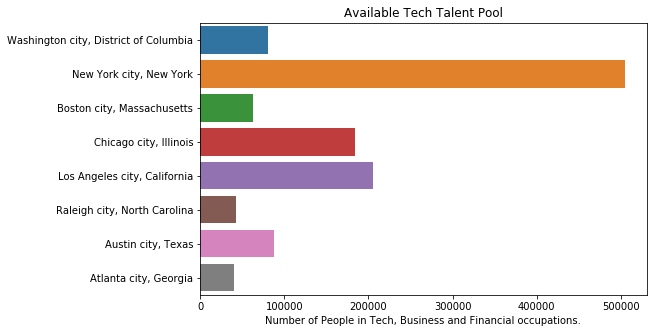

In [49]:
# Plotting Talent pool 
plt.figure(figsize=(8,5))
sns.barplot(y='NAME',x='Emp_Tech',data=laborForceDF)
plt.xlabel("Number of People in Tech, Business and Financial occupations.")
plt.ylabel("")
plt.title("Available Tech Talent Pool")
plt.show()

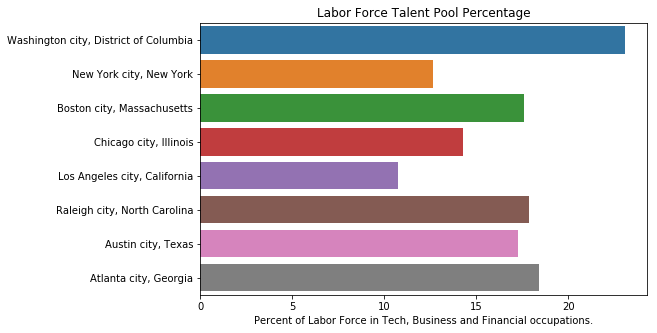

In [50]:

plt.figure(figsize=(8,5))

sns.barplot(y='NAME',x='Emp_Tech_Per',data=laborForceDF)
plt.xlabel("Percent of Labor Force in Tech, Business and Financial occupations.")
plt.ylabel("")
plt.title("Labor Force Talent Pool Percentage")
plt.show()

In [57]:
#Educational Attainment Statistics


#Get the fields for Labor Force
EducationalAttainmentFields = CensusFieldsMapDF.loc[CensusFieldsMapDF['Category'] == 'Educational Attainment',["Datafield"]]
EducationalAttainmentFields.head(10)

#laborForceFieldsCols = 

dictEducationFields = EducationalAttainmentFields.set_index('Datafield').to_dict()
EducationalAttainmentFields = EducationalAttainmentFields['Datafield']
dictEDFields = ['NAME']
for value in EducationalAttainmentFields.values:
    dictEDFields.append(value)
    

laborEDDF= censusDF.loc[:,dictEDFields]

laborEDDF['Ed_Total'] =laborEDDF['Ed_Associates']+laborEDDF['Ed_Bachelors']+laborEDDF['Ed_Doctorate']+laborEDDF['Ed_GED']+laborEDDF['Ed_HighSchool']+laborEDDF['Ed_Masters']+laborEDDF['Ed_Professional']
laborEDDF['Ed_Total_Bachelors_or_Higher'] = laborEDDF['Ed_Bachelors']+laborEDDF['Ed_Doctorate']+laborEDDF['Ed_Masters']+laborEDDF['Ed_Professional']

laborEDDF['Ed_Per']=(laborForceDF['Ed_Total_Bachelors_or_Higher']/laborForceDF['Ed_Total'])*100

EducationalAttainmentFields.head(10)
laborEDDF.head(10)

,NAME,Ed_Associates,Ed_Bachelors,Ed_Doctorate,Ed_GED,Ed_HighSchool,Ed_Masters,Ed_Professional,Ed_Total,Ed_Total_Bachelors_or_Higher
0,"Washington city, District of Columbia",14496.0,108252.0,19162.0,12052.0,71315.0,90366.0,38536.0,354179.0,256316.0
1,"New York city, New York",375851.0,1246538.0,85065.0,214018.0,1188696.0,610225.0,177697.0,3898090.0,2119525.0
2,"Boston city, Massachusetts",20664.0,113854.0,13352.0,12763.0,81785.0,59571.0,19259.0,321248.0,206036.0
3,"Chicago city, Illinois",104276.0,399364.0,27854.0,51774.0,368819.0,188113.0,54335.0,1194535.0,669666.0
4,"Los Angeles city, California",158229.0,566474.0,34199.0,41410.0,476667.0,187372.0,70748.0,1535099.0,858793.0
5,"Raleigh city, North Carolina",22290.0,91714.0,6010.0,6913.0,38696.0,35657.0,7709.0,208989.0,141090.0
6,"Austin city, Texas",31113.0,184101.0,13897.0,16485.0,83516.0,74426.0,18366.0,421904.0,290790.0
7,"Atlanta city, Georgia",14593.0,83300.0,6793.0,8852.0,50029.0,42727.0,15651.0,221945.0,148471.0


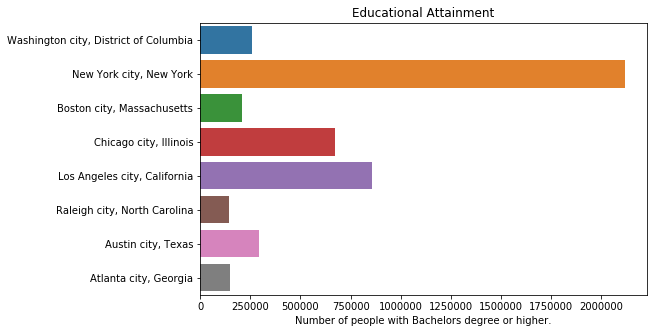

In [58]:
# Plotting EducationalAttainment
plt.figure(figsize=(8,5))
sns.barplot(y='NAME',x='Ed_Total_Bachelors_or_Higher',data=laborEDDF)
plt.xlabel("Number of people with Bachelors degree or higher.")
plt.ylabel("")
plt.title("Educational Attainment")
plt.show()